**some notebook stuff**

In [19]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

**Libraries**

In [21]:
import numpy as np
from matplotlib import pyplot as plt
import PIL
import cv2
import time
import pickle
import methods as mt
import csv

In [22]:
# Create list of nodes/edges of each molecule 
nodesList = [[]]
edgesList = [[]]

roots = mt.importMolecule('gxl')

listedMolecules = mt.moleculeToList(roots)
nodesList = listedMolecules[0]
edgesList = listedMolecules[1]
nodesList[0]
edgesList[0]

[10071, ['O', 'C', 'C', 'C', 'O', 'C', 'C', 'C', 'C', 'C', 'O', 'C']]

[10071,
 [[1, 2],
  [1, 3],
  [3, 4],
  [3, 5],
  [4, 6],
  [4, 7],
  [5, 8],
  [6, 9],
  [7, 10],
  [8, 11],
  [9, 12],
  [6, 8],
  [10, 12]]]

In [23]:
# Transform lists to dictionarys
nodesDict = mt.moleculeNodeListToDict(nodesList)
edgesDict = mt.moleculeEdgeListToDict(edgesList)
# Count number of adjacent edges of each node
edgesCountDict = mt.moleculeEdgesListToEdgeCountDict(nodesList, edgesDict)

## KNN Algorithm:
1. compare every molecule (from the valid set) with every other molecule (from the train set)
 - calculate for each the GED (graph edit distance between the two molecules) using bipartite graph matching
 - build cost matrix using Dirac cost function (see lecture 9 slide 36)
 - use Hungarian algorithm to find optimal assignment (using an existing framework!)
2. for ever molecule (from the valid set) find the K closest molecules (in the test set)
 - the K molecules with the shortest GED (since we only have two classes (active, inactive): use odd K!)
 - using valid.txt check if the KNN (the K closest neighbour molecules) are active or inactive
 - assign train molecule to the closer class (and check if assignment was correct using valid.txt (for accuracy measurement))
 - repeat for neighbourhood size k from 1 to train set size

In [99]:
# Read in train and valid files (len(train) + len(valid) = len(nodesList) (=len(edgesList)))
with open('train.txt', newline='') as train:
   reader = csv.reader(train, delimiter=' ')
   stringTrainRows = []
   for row in reader:
        stringTrainRows.append(row)
trainData = []
trainDict = dict()
for row in stringTrainRows:
    trainData.append([int(row[0]),row[1]])
    if (row[1] == 'a'):
        trainDict[int(row[0])] = {'class': row[1], 'value': 1}
    else:
        trainDict[int(row[0])] = {'class': row[1], 'value': 0}

with open('valid.txt', newline='') as train:
   reader = csv.reader(train, delimiter=' ')
   stringTrainRows = []
   for row in reader:
        stringTrainRows.append(row)
validDict = dict()
validData = []
for row in stringTrainRows:
    validData.append([int(row[0]),row[1]])
    if (row[1] == 'a'):
        validDict[int(row[0])] = {'class': row[1], 'value': 1}
    else:
        validDict[int(row[0])] = {'class': row[1], 'value': 0}

In [100]:
len(validData)

250

In [82]:
# Create distance matrix valid molecules to train molecules (takes approx. 23 min)
import datetime
distanceMatrix = np.matrix(np.zeros((len(validData), len(trainData))))
start_time = time.time()
matrix_size = distanceMatrix.shape[1] * distanceMatrix.shape[0]

for i in range(len(validData)):
    for j in range(len(trainData)):
        molecule1 = validData[i][0]
        molecule2 = trainData[j][0]
        # using Cn = Ce = 1
        dist = mt.BP(nodesDict[molecule1], nodesDict[molecule2], edgesCountDict[molecule1], edgesCountDict[molecule2])
        distanceMatrix[i,j] = dist
    time_elapsed = str(datetime.timedelta(seconds=int(time.time() - start_time)))
    print("progress:", (i+1) * 250,"/", matrix_size, round(100/matrix_size * (i+1) * 250), "%", "time elapsed:", time_elapsed)
print("--- %s seconds ---" % (int(time.time() - start_time)))
print(distanceMatrix)
np.save("distanceMatrix.npy", distanceMatrix)

progress: 250 / 125000 0 % time elapsed: 0:00:02
progress: 500 / 125000 0 % time elapsed: 0:00:04
progress: 750 / 125000 1 % time elapsed: 0:00:07
progress: 1000 / 125000 1 % time elapsed: 0:00:10
progress: 1250 / 125000 1 % time elapsed: 0:00:14
progress: 1500 / 125000 1 % time elapsed: 0:00:17
progress: 1750 / 125000 1 % time elapsed: 0:00:21
progress: 2000 / 125000 2 % time elapsed: 0:00:24
progress: 2250 / 125000 2 % time elapsed: 0:00:28
progress: 2500 / 125000 2 % time elapsed: 0:00:31
progress: 2750 / 125000 2 % time elapsed: 0:00:35
progress: 3000 / 125000 2 % time elapsed: 0:00:38
progress: 3250 / 125000 3 % time elapsed: 0:00:42
progress: 3500 / 125000 3 % time elapsed: 0:00:46
progress: 3750 / 125000 3 % time elapsed: 0:00:50
progress: 4000 / 125000 3 % time elapsed: 0:00:53
progress: 4250 / 125000 3 % time elapsed: 0:00:57
progress: 4500 / 125000 4 % time elapsed: 0:01:02
progress: 4750 / 125000 4 % time elapsed: 0:01:06
progress: 5000 / 125000 4 % time elapsed: 0:01:11
pro

progress: 40250 / 125000 32 % time elapsed: 0:11:41
progress: 40500 / 125000 32 % time elapsed: 0:11:43
progress: 40750 / 125000 33 % time elapsed: 0:11:45
progress: 41000 / 125000 33 % time elapsed: 0:11:47
progress: 41250 / 125000 33 % time elapsed: 0:11:49
progress: 41500 / 125000 33 % time elapsed: 0:11:51
progress: 41750 / 125000 33 % time elapsed: 0:11:53
progress: 42000 / 125000 34 % time elapsed: 0:11:55
progress: 42250 / 125000 34 % time elapsed: 0:11:57
progress: 42500 / 125000 34 % time elapsed: 0:11:59
progress: 42750 / 125000 34 % time elapsed: 0:12:01
progress: 43000 / 125000 34 % time elapsed: 0:12:03
progress: 43250 / 125000 35 % time elapsed: 0:12:05
progress: 43500 / 125000 35 % time elapsed: 0:12:07
progress: 43750 / 125000 35 % time elapsed: 0:12:10
progress: 44000 / 125000 35 % time elapsed: 0:12:12
progress: 44250 / 125000 35 % time elapsed: 0:12:14
progress: 44500 / 125000 36 % time elapsed: 0:12:16
progress: 44750 / 125000 36 % time elapsed: 0:12:19
progress: 45

progress: 79750 / 125000 64 % time elapsed: 0:25:45
progress: 80000 / 125000 64 % time elapsed: 0:25:47
progress: 80250 / 125000 64 % time elapsed: 0:25:49
progress: 80500 / 125000 64 % time elapsed: 0:25:52
progress: 80750 / 125000 65 % time elapsed: 0:25:54
progress: 81000 / 125000 65 % time elapsed: 0:25:56
progress: 81250 / 125000 65 % time elapsed: 0:25:58
progress: 81500 / 125000 65 % time elapsed: 0:26:00
progress: 81750 / 125000 65 % time elapsed: 0:26:03
progress: 82000 / 125000 66 % time elapsed: 0:26:05
progress: 82250 / 125000 66 % time elapsed: 0:26:07
progress: 82500 / 125000 66 % time elapsed: 0:26:10
progress: 82750 / 125000 66 % time elapsed: 0:26:12
progress: 83000 / 125000 66 % time elapsed: 0:26:14
progress: 83250 / 125000 67 % time elapsed: 0:26:16
progress: 83500 / 125000 67 % time elapsed: 0:26:18
progress: 83750 / 125000 67 % time elapsed: 0:26:21
progress: 84000 / 125000 67 % time elapsed: 0:26:23
progress: 84250 / 125000 67 % time elapsed: 0:26:25
progress: 84

progress: 119000 / 125000 95 % time elapsed: 0:32:09
progress: 119250 / 125000 95 % time elapsed: 0:32:11
progress: 119500 / 125000 96 % time elapsed: 0:32:14
progress: 119750 / 125000 96 % time elapsed: 0:32:17
progress: 120000 / 125000 96 % time elapsed: 0:32:20
progress: 120250 / 125000 96 % time elapsed: 0:32:22
progress: 120500 / 125000 96 % time elapsed: 0:32:25
progress: 120750 / 125000 97 % time elapsed: 0:32:27
progress: 121000 / 125000 97 % time elapsed: 0:32:30
progress: 121250 / 125000 97 % time elapsed: 0:32:33
progress: 121500 / 125000 97 % time elapsed: 0:32:36
progress: 121750 / 125000 97 % time elapsed: 0:32:38
progress: 122000 / 125000 98 % time elapsed: 0:32:41
progress: 122250 / 125000 98 % time elapsed: 0:32:44
progress: 122500 / 125000 98 % time elapsed: 0:32:47
progress: 122750 / 125000 98 % time elapsed: 0:32:50
progress: 123000 / 125000 98 % time elapsed: 0:32:52
progress: 123250 / 125000 99 % time elapsed: 0:32:54
progress: 123500 / 125000 99 % time elapsed: 0

In [39]:
a = np.array(validData) # n1 = 3
b = np.array(trainData) # n2 = 2
c = a[:, None][0] + b[0]
c

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U11'), dtype('<U11')) -> dtype('<U11')

In [116]:
accuracy = 0
k = 1
accs = []
k_vals = []
validLength = len(validData)
while k <= len(validData):
    for r in range(len(validData)):
        row = np.squeeze(np.asarray(distanceMatrix[r]))
        # print(row)
        idx = np.argpartition(row, k)
        # print(idx)
        sum = 0
        for i in range(k):
    #         print(row[idx[i]])
    #         print(validData[idx[i]][0])
    #         print(validDict[validData[idx[i]][0]])
            sum += trainDict[trainData[idx[i]][0]]['value']
    #     print("Sum = " , sum)
    #     print(trainDict[trainData[2][0]])

    
        if sum > k/2:
        #     active
            if validDict[validData[r][0]]['class'] == 'a' :
                accuracy += 1
        else:
        #     inactive
            if validDict[validData[r][0]]['class'] == 'i' :
                accuracy += 1
    accs.append(accuracy/validLength)
    k_vals.append(k)
    k += 2
    accuracy = 0

print(accuracy)
print(accuracy/len(validData))

0
0.0


#### Results
Plotting shows the best neigbhourhood size k is with k=3  
With k's larger than 99 the accuracy stays at 0.8.

(<Figure size 648x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1769d46cd00>)

Text(0.5, 0, 'k')

Text(0, 0.5, 'accuracy')

Text(0.5, 1.0, 'Accuracy over increasing neighbourhood sizes K')

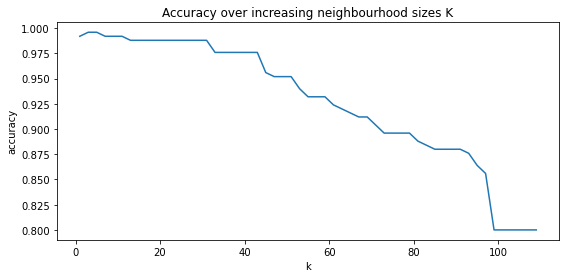

In [150]:
import matplotlib as plt
import matplotlib.pyplot as plt
plt.subplots(figsize=(9,4))
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_vals[:55], accs[:55])
plt.title("Accuracy over increasing neighbourhood sizes K")
plt.show()
#plt.savefig("rmse_all.png", dpi=300)

In [151]:
print("Worst K:", k_vals[np.argmin(accs)], "with accuracy:", min(accs))

Worst K: 99 with accuracy: 0.8


In [152]:
print("Beest K:", k_vals[np.argmax(accs)], "with accuracy:", max(accs))

Beest K: 3 with accuracy: 0.996
